In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

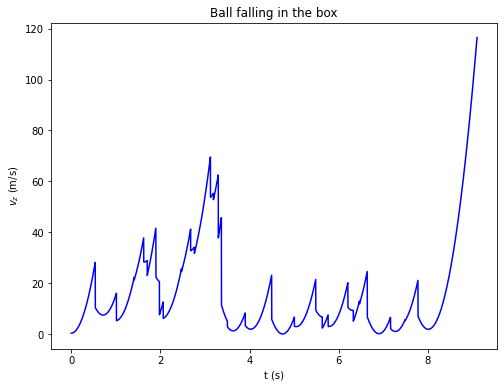

In [5]:
#Mike Blanchard and Reilly Kobbe
#Project 00 - Plinko Board
#Dr. Titus
#PHY-2200

scene1 = canvas(title = "Plinko Board")

#Declare lists 
ball1 =[]
tlist = []
vzlist = []
klist = []
rods = []

m = 2 #mass of an atom
g = 9.8 #gravity

Rrod = .2 #radius of rod 
Rball = 2 * Rrod #radius of ball
ball = sphere(pos=vec(rand.uniform(-4,4),10,1), radius=Rball, color=color.cyan) #create ball
Fgrav = vec(0,-m*g,0) #force of gravity
ball.v = vec(rand.uniform(-2,2),0,0) #velocity of ball 
while ball.v == 0:
    ball.v.x = rand.uniform(-2,2)
    
#time and time displacement 
t = 0 
dt = .001 #updates pos every .01 seconds 

#visual objects (walls)
Lwall = box(pos = vec(-10, 0, 0), size = vec(1, 20, 1), color=color.white)
Rwall = box(pos = vec(10, 0, 0), size = vec(1, 20, 1), color=color.white)
Bwall = box(pos = vec(0, -10, 0), size = vec(20, 1, 1), color=color.white)

#Cylinders in the box i = height, j = width
for i in range(-8,9): 
    for j in range(-8,9):
        if i % 2 == 0: 
            rod = cylinder(pos=vec(i,-8,0),axis=vec(0,0,2), radius=Rrod, collided = False) #radius was .15
            rods.append(rod)
        elif j % 2 ==0:
            rod = cylinder(pos=vec(j,i,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod)
for k in range(-8,9): 
    for l in range(-8,9):
        if k % 2 != 0: 
            rod = cylinder(pos=vec(k,-8,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod)
        elif l % 2 !=0:
            rod = cylinder(pos=vec(l,k,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod)
              
#Pause/play
scene1.pause()

while ball.pos.y > -10:
        rate(10000000)
        
        tlist.append(t)
        vzlist.append(ball.v.z) 
        k = 1/2*m*mag(ball.v)**2
        klist.append(k)

        ball.v = ball.v + Fgrav/m*dt
        ball.pos = ball.pos + ball.v*dt 

        #loop to check for a collision on each rod
        for i in range(len(rods)):
            rodcenter = rods[i].pos+rods[i].axis/2
            r = ball.pos - rodcenter
            if mag(r) < Rrod+Rball and rods[i].collided==False: #check collision
                rhat = hat(r)
                vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = -vballrad * .5 #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball velocity after colision
                rods[i].collided=True
            elif mag(r) > Rrod+Rball and rods[i].collided==True:
                rods[i].collided=False

        if ball.pos.x >= 9.5:
            ball.v.x = - abs(ball.v.x)
        elif ball.pos.x <= -9.5:
            ball.v.x = abs(ball.v.x)

    
        t = t + dt

#creation of the histogram
fig = plt.figure(figsize=(8,6))
plt.title('Ball falling in the box')
plt.xlabel('t (s)')
plt.ylabel('$v_z$ (m/s)')
plt.plot(tlist, klist, 'b-')
plt.show()
    